In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import fftconvolve
from scipy.spatial.distance import mahalanobis
from matplotlib.patches import Ellipse
import imageio.v2 as imageio

1. Define functions to compute DFT and autocorrelation features

In [2]:
def compute_dft(image):
    return np.abs(np.fft.fft2(image))

def compute_autocorrelation(image):
    autocorr = fftconvolve(image, image[::-1, ::-1], mode='full')
    return autocorr[autocorr.shape[0] // 2, autocorr.shape[1] // 2:]


2. Load the Brodatz database of textures :

In [3]:
def load_images(folder_path, families):
    images = {}
    for family, file_names in families:
        for file_name in file_names:
            image_path = os.path.join(folder_path, file_name)
            image = Image.open(image_path).convert('L')
            images[file_name] = np.array(image)
    return images

In [4]:
folder_path = r"C:\Users\ksevi\OneDrive\Desktop\MASTER\SCENE_LALIGANT\septimo report\Original Brodatz"

families = [('Bricks', ['D1.gif', 'D26.gif', 'D95.gif']),
            ('Wood', ['D69.gif', 'D70.gif', 'D68.gif']),
            ('Fabric', ['D19.gif', 'D42.gif', 'D53.gif']),
            ('Grass', ['D15.gif', 'D87.gif', 'D89.gif'])]

# Load images from the given directory and families list
images = load_images(folder_path, families)

In [5]:
def load_images(folder_path, families):
    images = {}
    for family, file_names in families:
        images[family] = [imageio.imread(os.path.join(folder_path, file_name)) for file_name in file_names]
    return images

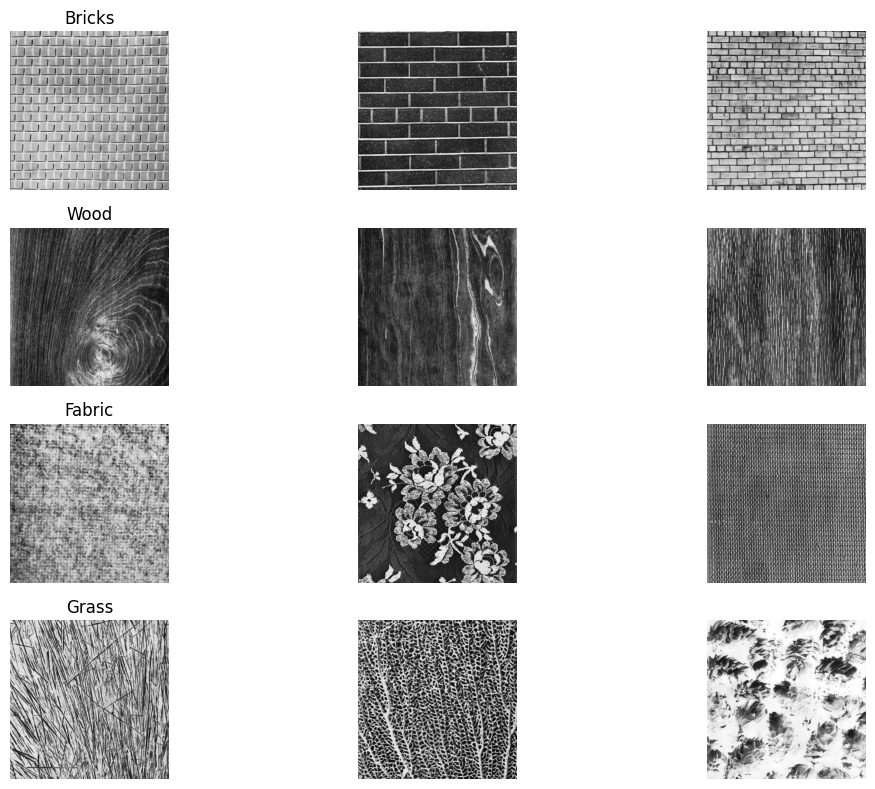

In [6]:
#plotting dataset
def load_images_datas(folder_path, families):
    images = {}
    for family, file_names in families:
        images[family] = [imageio.imread(os.path.join(folder_path, file_name)) for file_name in file_names]
    return images
def plot_images(images):
    fig, axes = plt.subplots(len(families), len(families[0][1]), figsize=(12, 8))

    for i, (family, imgs) in enumerate(images.items()):
        for j, img in enumerate(imgs):
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(family)

    plt.tight_layout()
    plt.show()

images_dataset = load_images_datas(folder_path, families)
plot_images(images_dataset)

3. Define a function to compute the distance between a test image and a texture family:

In [7]:
def extract_features(images):
    features = {}
    for file_name, image in images.items():
        dft = compute_dft(image)
        autocorr = compute_autocorrelation(image)
        m1, m2 = np.mean(dft), np.mean(autocorr)
        features[file_name] = (m1, m2)
    return features

4. Load the texture families, compute the features, and classify a new image:

In [8]:
# Calculate the attributes (m1, m2) for each image using DFT and Autocorrelation
features = extract_features(images)

In [9]:
def compute_family_stats(features, families):
    family_stats = {}
    for family, file_names in families:
        family_features = [features[file_name] for file_name in file_names]
        mean = np.mean(family_features, axis=0)
        std_dev = np.std(family_features, axis=0)
        family_stats[family] = (mean, std_dev)
    return family_stats

In [10]:
# Compute the mean and standard deviation for each family
family_stats = compute_family_stats(features, families)

In [11]:
family_colors = {
                'Bricks': 'red',
                'Wood': 'green',
                'Fabric': 'blue',
                'Grass': 'yellow'}

def create_ellipses(family_stats, family_colors):
    ellipses = []
    for family, (mean, std_dev) in family_stats.items():
        color = family_colors.get(family, 'black')
        ellipse = Ellipse(xy=mean, width=std_dev[0] * 2, height=std_dev[1] * 2, alpha=0.5, color=color)
        ellipses.append((family, ellipse))
    return ellipses

In [12]:
# Represent each family by an ellipse
ellipses = create_ellipses(family_stats, family_colors)

In [13]:
def plot_results(ellipses, features, images, families):
    fig, ax = plt.subplots()
    
    for family, ellipse in ellipses:
        ax.add_artist(ellipse)
        ellipse.set_clip_box(ax.bbox)
        ellipse.set_label(family)
    
    for family, file_names in families:
        for file_name in file_names:
            plt.scatter(*features[file_name], marker='o')
            plt.annotate(file_name, (features[file_name][0], features[file_name][1]))
    
    plt.legend()
    plt.xlabel('DFT')
    plt.ylabel('Autocorrelation')
    plt.show()

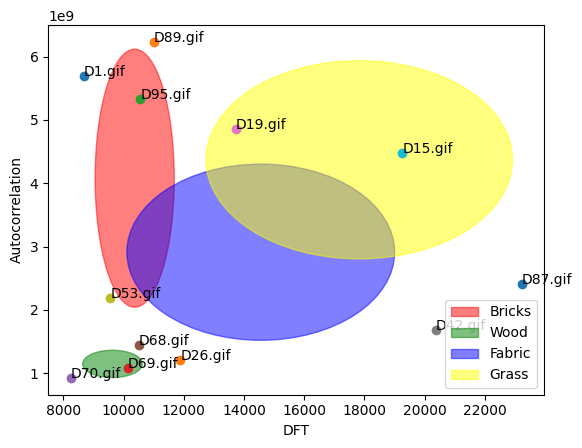

In [14]:
# Visualize the ellipses and images
plot_results(ellipses, features, images, families)